In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [2]:
yield_data = pd.read_csv('/content/yield_df.csv')

**Data** **Understanding**

In [3]:
yield_data


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [4]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [5]:
yield_data.drop(columns="Unnamed: 0",inplace=True)

In [6]:
yield_data.rename(columns={"hg/ha_yield":"total_yield"}, inplace=True)

In [7]:
yield_data

,Area,Item,Year,total_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [8]:
yield_data["total_yield"] = yield_data["total_yield"].astype("float64")
yield_data["average_rain_fall_mm_per_year"] = yield_data["average_rain_fall_mm_per_year"].astype("float64")

In [9]:
continous = ["total_yield", "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]

discrete_count = ["Year"]

discrete_categorical = ["Area", "Item"]

In [10]:
#Checking Skewness
yield_data[continous].skew()

,0
total_yield,1.793229
average_rain_fall_mm_per_year,0.853832
pesticides_tonnes,3.490289
avg_temp,-0.741582


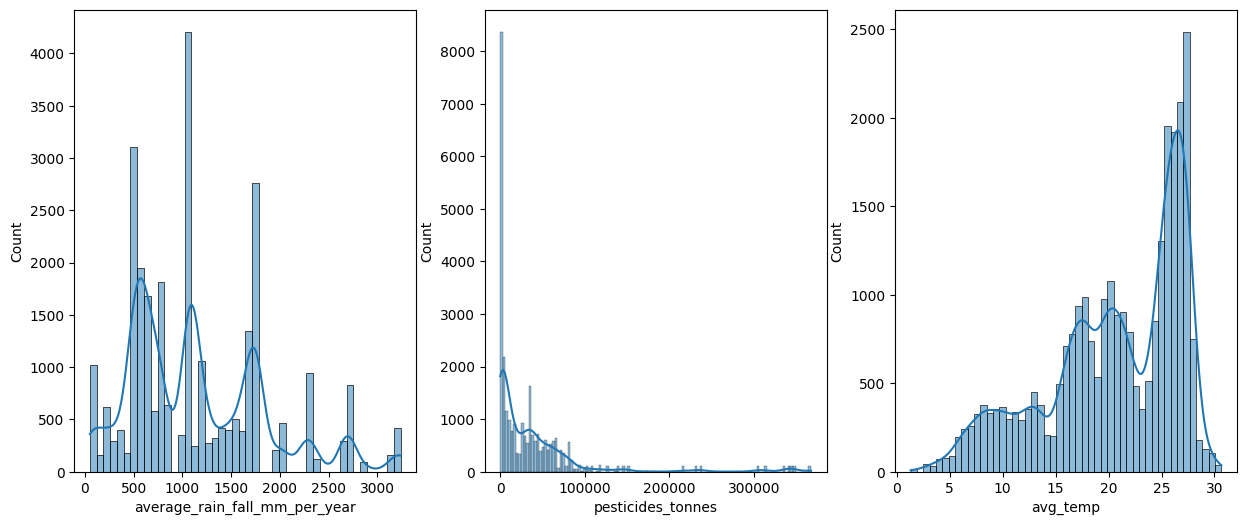

In [11]:
#Distribution of data
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.histplot(yield_data["average_rain_fall_mm_per_year"], kde=True)

plt.subplot(1,3,2)
sns.histplot(yield_data["pesticides_tonnes"], kde=True)

plt.subplot(1,3,3)
sns.histplot(yield_data["avg_temp"], kde=True)

plt.show()



*   "average_rain_fall_mm_per_year" and "avg_temp" are having Normally distributed data
*   "pesticides_tonnes" is having Right Skewed data

**Outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


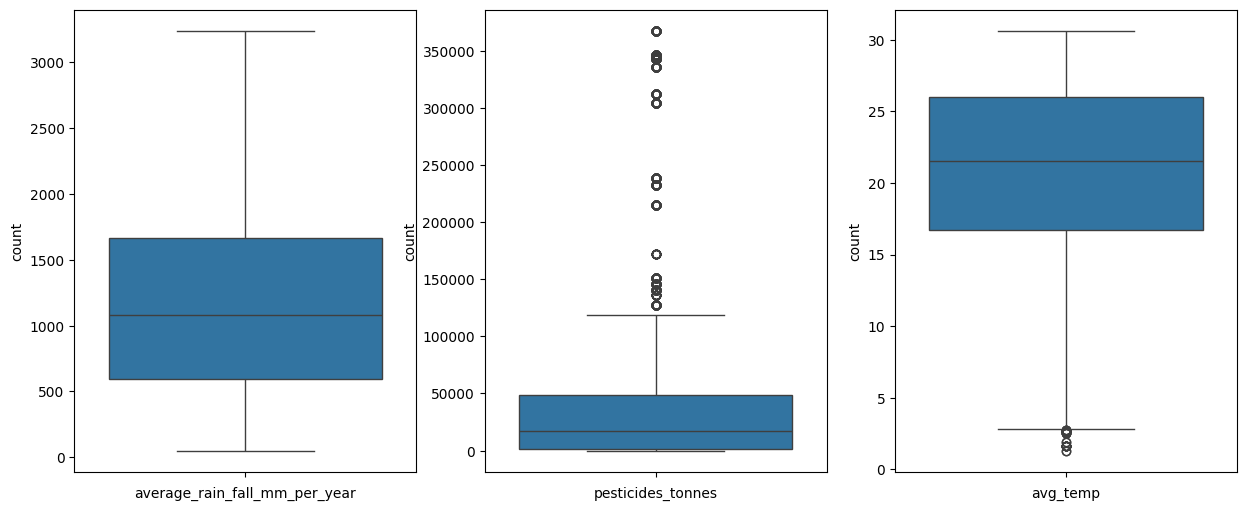

In [12]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
sns.boxplot(yield_data["average_rain_fall_mm_per_year"])
plt.xlabel("average_rain_fall_mm_per_year")
plt.ylabel("count")

plt.subplot(1,3,2)
sns.boxplot(yield_data["pesticides_tonnes"])
plt.xlabel("pesticides_tonnes")
plt.ylabel("count")

plt.subplot(1,3,3)
sns.boxplot(yield_data["avg_temp"])
plt.xlabel("avg_temp")
plt.ylabel("count")

plt.show()



*   "average_rain_fall_mm_per_year" and "avg_temp" are having Outliers in data
*   "pesticides_tonnes" is not having Outliers



**Duplicates**

In [13]:
yield_data.duplicated().sum()

2310

# Data Preprocessing

Converting Right Skewed data into Normally Distributed data

In [14]:
from scipy.stats import boxcox

boxcox(yield_data["pesticides_tonnes"])

yield_data["avg_boxcox"], param = boxcox(yield_data["pesticides_tonnes"])
yield_data["avg_boxcox"].skew()

-0.14159023174487217

In [15]:
yield_data["pesticides_tonnes"] = yield_data["avg_boxcox"]
yield_data.drop(columns=["avg_boxcox"], inplace=True)

Encoding and Standardization

In [16]:
area_encoder = LabelEncoder()
item_encoder = LabelEncoder()


yield_data["Area"] = area_encoder.fit_transform(yield_data["Area"])
yield_data["Item"] = item_encoder.fit_transform(yield_data["Item"])

Train-Test Split

In [17]:
X = yield_data.drop('total_yield', axis=1)
y = yield_data['total_yield']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Modelling and Evaluation

In [18]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [19]:
model = {
    'Linear Regression' : LinearRegression(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(),
    "XGB Regressor" : XGBRegressor()

}

for name, mod in model.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    print(f"{name}\nMean Squared Error : {np.sqrt(mean_squared_error(y_test, y_pred))}\nScore {r2_score(y_test,y_pred)}\n")

Linear Regression
Mean Squared Error : 80852.08620158922
Score 0.09879301553673503

K Neighbors Regressor
Mean Squared Error : 55183.1146293406
Score 0.5801883304861266

Decision Tree Regressor
Mean Squared Error : 13211.190235825037
Score 0.9759383181169221

Random Forest Regressor
Mean Squared Error : 10135.46523142438
Score 0.9858378410451943

Gradient Boosting Regressor
Mean Squared Error : 34773.822585474634
Score 0.833295640875001

XGB Regressor
Mean Squared Error : 13451.947664464684
Score 0.975053338957936



We find that the Mean Squared Error is least for a Random Forest Regressor and hence train the model on that

In [20]:

model = {
    'Linear Regression': LinearRegression(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGB Regressor": XGBRegressor()
}


model_names = []
mse_values = []
r2_scores = []


for name, mod in model.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}\nMean Squared Error: {np.sqrt(mse)}\nR2 Score: {r2}\n")

    model_names.append(name)
    mse_values.append(np.sqrt(mse))
    r2_scores.append(r2)

Linear Regression
Mean Squared Error: 80852.08620158922
R2 Score: 0.09879301553673503

K Neighbors Regressor
Mean Squared Error: 55183.1146293406
R2 Score: 0.5801883304861266

Decision Tree Regressor
Mean Squared Error: 13143.183418235265
R2 Score: 0.9761854036053456

Random Forest Regressor
Mean Squared Error: 10197.74507369048
R2 Score: 0.9856632606208724

Gradient Boosting Regressor
Mean Squared Error: 34773.82258547464
R2 Score: 0.833295640875001

XGB Regressor
Mean Squared Error: 13451.947664464684
R2 Score: 0.975053338957936



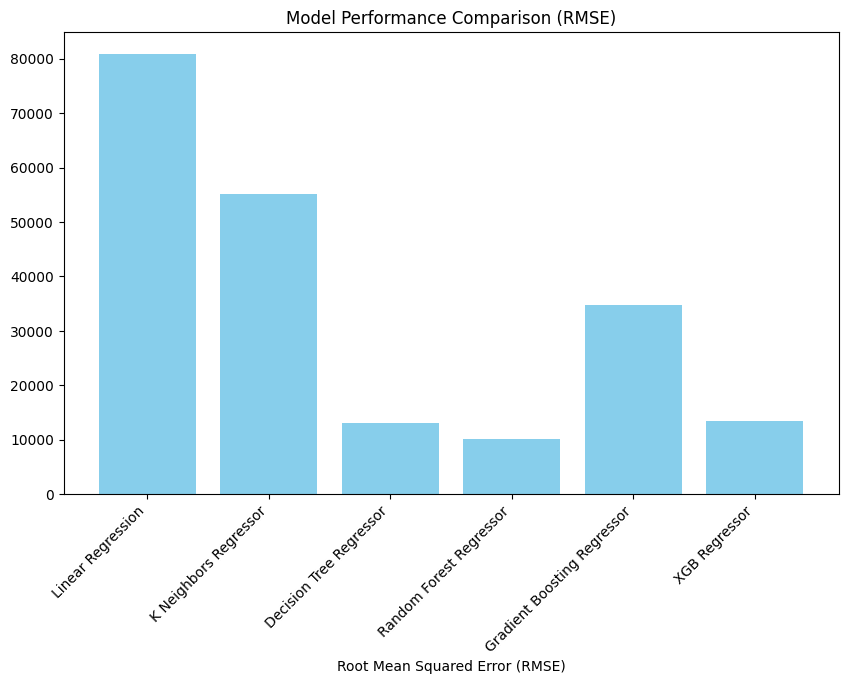

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.title('Model Performance Comparison (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.show()

We find that Random Forest Regressor has the least MSE and so we train the model on that

In [22]:
random_forest_model = model['Random Forest Regressor']
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

Getting feature Importance

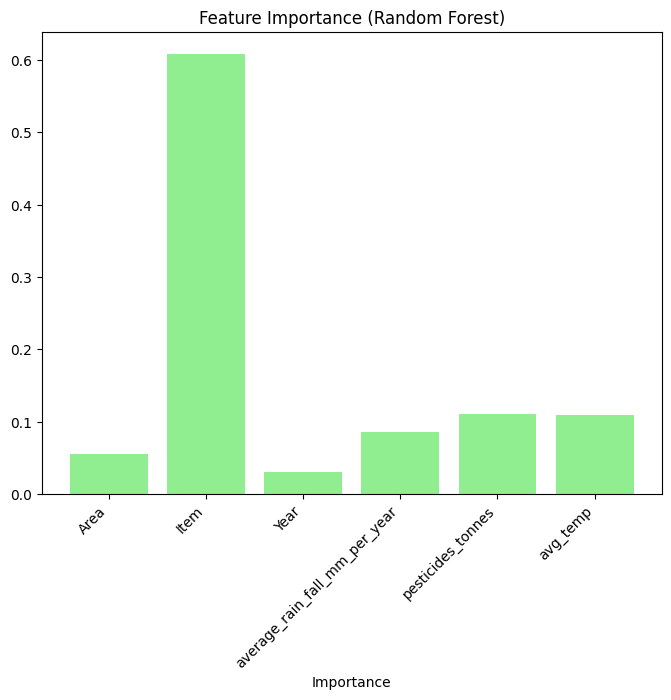

In [23]:
importances = random_forest_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=45, ha='right')
plt.show()


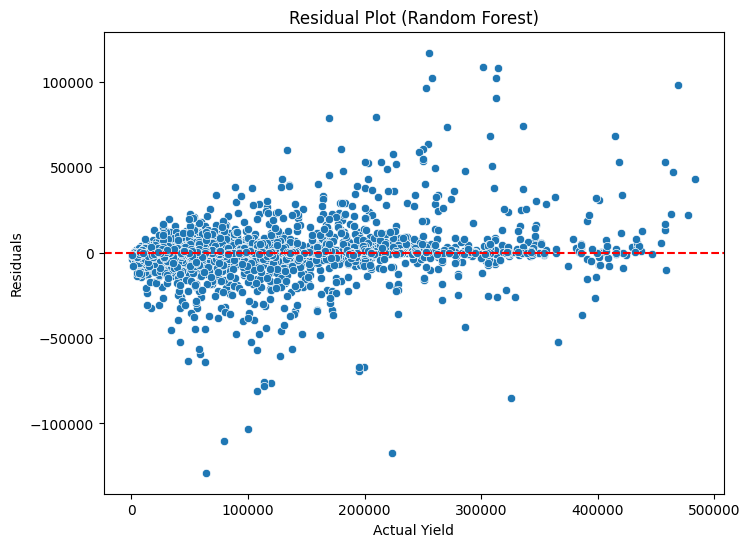

In [24]:
import seaborn as sns

# Residuals: difference between actual and predicted values
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()


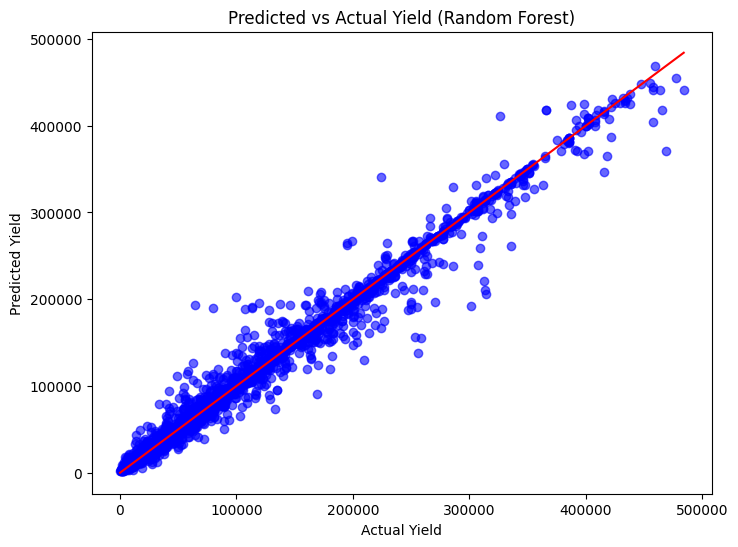

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Predicted vs Actual Yield (Random Forest)')
plt.show()


# To predict output for user input

In [26]:
def encode_input(area, item):
    area = area.strip().title()
    item = item.strip().title()

    try:
        area_encoded = area_encoder.transform([area])[0]
    except ValueError:
        print(f"Unknown Area: {area}. Please ensure it is in the training data.")
        return None, None

    try:
        item_encoded = item_encoder.transform([item])[0]
    except ValueError:
        print(f"Unknown Item: {item}. Please ensure it is in the training data.")
        return None, None

    return area_encoded, item_encoded


def predict_yield(model):
    print("Enter the following features:")
    area = input("Area: ")
    item = input("Item: ")
    year = int(input("Year: "))
    average_rain_fall = float(input("Average Rainfall (mm): "))
    pesticides_tonnes = float(input("Pesticides (tonnes): "))
    avg_temp = float(input("Average Temperature (°C): "))


    area_encoded, item_encoded = encode_input(area, item)

    if area_encoded is None or item_encoded is None:
        return

    # Create a DataFrame with the user input
    user_input = pd.DataFrame({
        'Area': [area_encoded],
        'Item': [item_encoded],
        'Year': [year],
        'average_rain_fall_mm_per_year': [average_rain_fall],
        'pesticides_tonnes': [pesticides_tonnes],
        'avg_temp': [avg_temp]
    })

    # Predict yield using the trained model
    predicted_yield = model.predict(user_input)

    print(f"Predicted Yield: {predicted_yield[0]}")


predict_yield(random_forest_model)

Enter the following features:
Area: Albania
Item: Maize
Year: 1990
Average Rainfall (mm): 1485.0
Pesticides (tonnes): 121.0
Average Temperature (°C): 16.37
Predicted Yield: 35966.13
